<a href="https://colab.research.google.com/github/msribeiror29/ML_Performance-evaluation/blob/main/Case_IV_Prediction_of_insurance_costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prediction of insurance costs.

The objective is to receive an insurance database and try to predict the cost of this insurance. To do this, we will need to process the data, test different machine learning modelsl, and in the end, choose the most performant.

Various libraries and techniques will be used such as Pandas, NumPy, Seaborn, Scikit-Learn, and hyperparameter optimization for train, evaluate, and improve the performance of the models.

Let's remember the main topics that will be covered:

* Database processing.
* Categorical variables.
* Linear Regression.
* Machine Learning models.
* Model tuning.
* Performance evaluation.




In [92]:
import pandas as pd
import numpy as np
import seaborn as sns

#Database processing.

####Carry out an exploratory analysis. We must understand what variables are available, the types of data, missing values​​, and the data distribution.

In [93]:
df = pd.read_excel('/content/insurance.xlsx')
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1341 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1341 non-null   float64
 3   quantidade_filhos  1341 non-null   int64  
 4   fumante            1341 non-null   object 
 5   regiao             1341 non-null   object 
 6   custos_seguro      1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.5+ KB


#Categorical variables.

####The dataset has categorical variables such as gender, region, and whether the person smokes. To transform these variables into numerical values, the Label Encoding technique will be used:

In [95]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [96]:
#sexo
le.fit(df.sexo)
df.sexo = le.transform(df.sexo)

#fumante
le.fit(df.fumante)
df.fumante = le.transform(df.fumante)

#regiao
le.fit(df.regiao)
df.regiao = le.transform(df.regiao)


In [97]:
df.shape

(1341, 7)

###This converted the text values. Then, the data was normalized to the same scale using MinMaxScaler:

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame (scaler.fit_transform(df), index = df.index, columns = df.columns)

In [100]:
df_norm.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.264777
1,0.000000,0.5,0.479150,0.2,0.0,0.666667,0.027059
2,0.217391,0.5,0.473500,0.6,0.0,0.666667,0.069773
3,0.326087,0.5,0.181464,0.0,0.0,0.333333,0.344744
4,0.304348,0.5,0.347592,0.0,0.0,0.333333,0.060637


####Some exploratory analyses were performed to understand the relationships in the data. These showed statistics such as mean, standard deviation, and minimum and maximum values ​​of the variables.

In [101]:
df_norm.describe()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,0.460575,0.254288,0.396150,0.218494,0.204325,0.504101,0.207631
std,0.305238,0.252285,0.164321,0.241051,0.403358,0.368657,0.189942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278585,0.000000,0.000000,0.333333,0.074008
50%,0.456522,0.500000,0.388485,0.200000,0.000000,0.666667,0.146797
75%,0.717391,0.500000,0.506053,0.400000,0.000000,0.666667,0.260097
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1341 non-null   float64
 1   sexo               1341 non-null   float64
 2   imc                1341 non-null   float64
 3   quantidade_filhos  1341 non-null   float64
 4   fumante            1341 non-null   float64
 5   regiao             1341 non-null   float64
 6   custos_seguro      1341 non-null   float64
dtypes: float64(7)
memory usage: 73.5 KB


In [103]:
df_norm.dropna(inplace = True)

####Graphs were generated with Seaborn to visualize the distribution of data:

<Axes: xlabel='custos_seguro', ylabel='Count'>

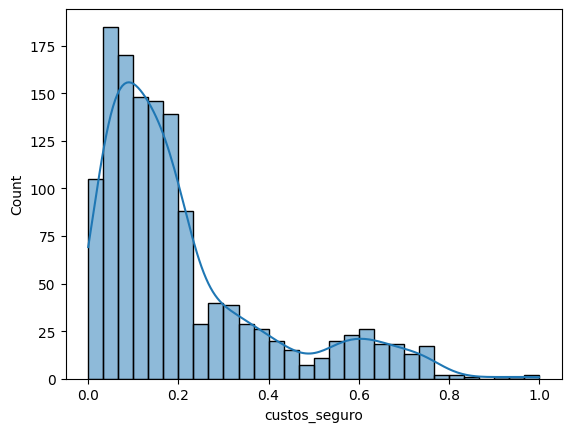

In [104]:
sns.histplot(df_norm, x="custos_seguro", kde=True)

<Axes: >

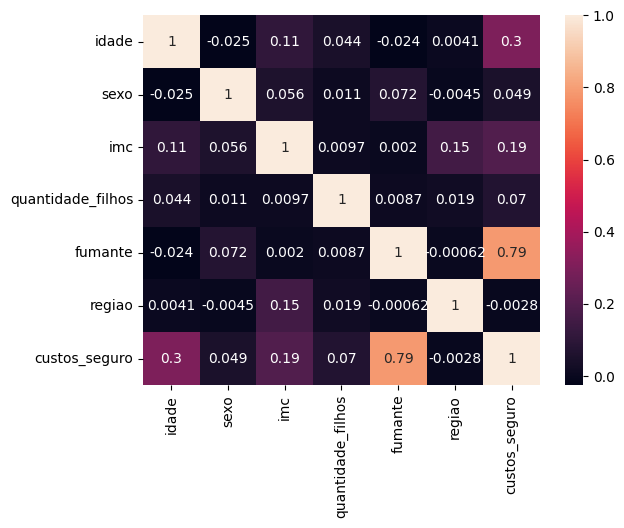

In [105]:
sns.heatmap(df_norm.corr(), annot=True)

####This helped to identify variables with a high correlation with the value of the insurance, which would be good predictors, such as age and BMI.

#Variable Selection.

####A linear regression (OLS) was performed as a baseline:

In [106]:
import statsmodels.formula.api as smf

In [107]:
function = 'custos_seguro~idade+sexo+imc+quantidade_filhos+fumante+regiao'
model= smf.ols(formula = function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          custos_seguro   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.8
Date:                Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:37:25   Log-Likelihood:                 1255.2
No. Observations:                1341   AIC:                            -2496.
Df Residuals:                    1334   BIC:                            -2460.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0289      0.00

####Analyzing the p-values, the gender variable was not statistically significant, so it was removed from the model.

####The other variables (age, BMI, number of children, smoker and region) were maintained to train the predictive models.


In [108]:
function = 'custos_seguro~idade+imc+quantidade_filhos+fumante+regiao'
model= smf.ols(formula = function, data=df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          custos_seguro   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     801.5
Date:                Sat, 13 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:37:29   Log-Likelihood:                 1255.0
No. Observations:                1341   AIC:                            -2498.
Df Residuals:                    1335   BIC:                            -2467.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0306      0.00

#Machine Learning Models.

####The data was divided into training and testing sets to train and evaluate the models:

In [109]:
from sklearn.model_selection import train_test_split
from sklearn .linear_model import LinearRegression
from sklearn import metrics

In [110]:
x = df_norm [["idade","imc", "quantidade_filhos", "fumante", "regiao"]]
y = df_norm [["custos_seguro"]]

In [111]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size= 0.2, random_state = 0)

lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [112]:
r = lr.score(x,y)
print(r)

0.7501115051040573


In [113]:
y_pred_treino = lr.predict(x_train)
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_treino))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_treino))
print('RMSE:',np.sqrt (metrics.mean_squared_error(y_train, y_pred_treino)))

MAE: 0.06497503143061137
MSE: 0.008898306449294836
RMSE: 0.09433083509274598


In [114]:
y_pred_teste = lr.predict(x_test)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_teste))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_teste))
print('RMSE:',np.sqrt (metrics.mean_squared_error(y_test, y_pred_teste)))

MAE: 0.06689728998613144
MSE: 0.009448963059945565
RMSE: 0.09720577688566438


In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)

<ipython-input-116-112ccb7d7e2e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [117]:
rf_sq = rf.score(x, y)
print(rf_sq)

y_pred_train = rf.predict(x_train)
print('MAE y_train:', metrics.mean_absolute_error(y_train, y_pred_train))

y_pred_test = rf.predict(x_test)
print('MAE X_test:', metrics.mean_absolute_error(y_test, y_pred_test))

0.9493313237872603
MAE y_train: 0.015532537035612649
MAE X_test: 0.04443334477594824


In [118]:
from sklearn.ensemble import AdaBoostRegressor

In [119]:
ada = AdaBoostRegressor(n_estimators = 100)
ada.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=100)

In [120]:
ada_sq = ada.score(x, y)
print(ada_sq)

y_pred_train = ada.predict(x_train)
print('MAE y_train:', metrics.mean_absolute_error(y_train, y_pred_train))

y_pred_test = ada.predict(x_test)
print('MAE X_test:', metrics.mean_absolute_error(y_test, y_pred_test))

0.8361244210038106
MAE y_train: 0.0599500633824745
MAE X_test: 0.06159060991152282


In [121]:
from sklearn.ensemble import GradientBoostingRegressor

In [122]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [123]:
gbr_sq = gbr.score(x, y)
print(gbr_sq)

y_pred_train = gbr.predict(x_train)
print('MAE y_train:', metrics.mean_absolute_error(y_train, y_pred_train))

y_pred_test = gbr.predict(x_test)
print('MAE X_test:', metrics.mean_absolute_error(y_test, y_pred_test))

0.8976285702214496
MAE y_train: 0.031505186002482775
MAE X_test: 0.03997604938630355


####The GradientBoostingRegressor that performed best with R2 of 0.89 and mean absolute error (MAE y_train:03) of 03 and (MAE X_test:0.3).

####It presented a slightly better result, so it was chosen for hyperparameter optimization with Grid Search.

#GridSearch GradientBoosting

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
parameters = {'learning_rate': [0.03],
                  'subsample'    : [0.2],
                  'n_estimators' : [100],
                  'max_depth'    : [8]
                 }

grid_search = GridSearchCV(gbr, parameters, scoring='r2', cv=2, n_jobs=-1)

In [126]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.03], 'max_depth': [8],
                         'n_estimators': [100], 'subsample': [0.2]},
             scoring='r2')

In [127]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=8, subsample=0.2)

 The best score across ALL searched params:
 0.8206673306872854

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.2}


In [128]:
best_model = grid_search.best_estimator_

In [129]:
best_model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.03,
 'loss': 'squared_error',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 0.2,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [130]:
gbr_tunned = GradientBoostingRegressor(alpha= 0.9,
 ccp_alpha= 0.0,
 criterion= 'friedman_mse',
 init= None,
 learning_rate= 0.03,
 loss= 'squared_error',
 max_depth= 8,
 max_features= None,
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 1000,
 n_iter_no_change= None,
 random_state= None,
 subsample= 0.2,
 tol= 0.0001,
 validation_fraction= 0.1,
 verbose= 0,
 warm_start= False)

gbr_tunned.fit(x_train, y_train)
gbr_tunned_pred_train = gbr_tunned.predict(x_train)
gbr_tunned_pred_test = gbr_tunned.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [131]:
gbr_tunned = gbr_tunned.score(x, y)

print(gbr_tunned)
print("MAE:", metrics.mean_absolute_error(y_train, gbr_tunned_pred_train))
print("MAE:", metrics.mean_absolute_error(y_test, gbr_tunned_pred_test))

0.9527746217457771
MAE: 0.01017603326794063
MAE: 0.05804368821735925


####This tests combinations of hyperparameter values ​​to find the optimal configuration.

####The optimized GradientBoostingRegressor model obtained R2 of 0.95 and MAE of 0.01 in the training set. In the test set, R2 of 0.95 and MAE of 0.5.

####There was an improvement compared to the initial model, indicating that the hyperparameter optimization was effective.

